# Data PreProcessing

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, silhouette_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_csv('../house_prices_selection.csv')
print(df.shape)
df.head()


(1460, 32)


,EVI,ZoningScore,MSZoning_RL,LotConfig_CulDSac,LandContour_HLS,LotShape_IR2,Condition1_Norm,Condition1_Feedr,LotShape_Reg,MSZoning_RM,...,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,TotalBsmtSF,1stFlrSF,BsmtQual,CentralAir,Foundation
0,0.437530,0.835044,True,False,False,False,True,False,True,False,...,7,2003,2003,196.0,1710,856,856,Gd,Y,PConc
1,0.364741,0.835044,True,False,False,False,False,True,True,False,...,6,1976,1976,0.0,1262,1262,1262,Gd,Y,CBlock
2,0.411955,0.835044,True,False,False,False,True,False,False,False,...,7,2001,2002,162.0,1786,920,920,Gd,Y,PConc
3,0.394783,0.835044,True,False,False,False,True,False,False,False,...,7,1915,1970,0.0,1717,756,961,TA,Y,BrkTil
4,0.399533,0.835044,True,False,False,False,True,False,False,False,...,8,2000,2000,350.0,2198,1145,1145,Gd,Y,PConc


In [27]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
boolean_features = df.select_dtypes(include=['bool']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Boolean Features:", boolean_features)

if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')

print("\n// ===== CONVERTIRE BOOLEAN =====")
for cols in boolean_features:
    df[cols] = df[cols].astype(int)

numerical_features.extend(boolean_features)
print(f"Coloane numerice (inclusiv boolean) ({len(numerical_features)}): {numerical_features}")
print(f"\nColoane categorice ({len(categorical_features)}): {categorical_features}")

Numerical Features: ['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'SalePrice', 'LotFrontage', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']
Categorical Features: ['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation']
Boolean Features: ['MSZoning_RL', 'LotConfig_CulDSac', 'LandContour_HLS', 'LotShape_IR2', 'Condition1_Norm', 'Condition1_Feedr', 'LotShape_Reg', 'MSZoning_RM']

// ===== CONVERTIRE BOOLEAN =====
Coloane numerice (inclusiv boolean) (26): ['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'MSZoning_RL', 'LotConfig_CulDSac', 'LandContour_HLS', 'LotShape_IR2', 'Condition1_Norm', 'Condition1_Feedr', 'LotShape_Reg', 'MSZoning_RM']

Coloane categori

In [28]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']
print(f"Features shape: {X.shape}")
print(f"Target shape: {Y.shape}")

Features shape: (1460, 31)
Target shape: (1460,)


In [29]:
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)
print(f"Shape după preprocessing: {X_preprocessed.shape}")

Shape după preprocessing: (1460, 40)


K=2: Inertia=33202.57, Silhouette=0.1784
K=3: Inertia=29274.28, Silhouette=0.1815
K=4: Inertia=27498.87, Silhouette=0.1551
K=5: Inertia=25938.72, Silhouette=0.1670
K=6: Inertia=24521.81, Silhouette=0.1715
K=7: Inertia=23347.46, Silhouette=0.1536
K=8: Inertia=22244.47, Silhouette=0.1736
K=9: Inertia=21246.52, Silhouette=0.1753
K=10: Inertia=20277.65, Silhouette=0.1851
K=11: Inertia=19629.58, Silhouette=0.1582
K=12: Inertia=19281.62, Silhouette=0.1341
K=13: Inertia=18332.09, Silhouette=0.1514
K=14: Inertia=18132.89, Silhouette=0.1500
K=15: Inertia=17702.72, Silhouette=0.1509
K=16: Inertia=17464.45, Silhouette=0.1340
K=17: Inertia=17209.87, Silhouette=0.1327
K=18: Inertia=17046.27, Silhouette=0.1167
K=19: Inertia=16657.68, Silhouette=0.1450


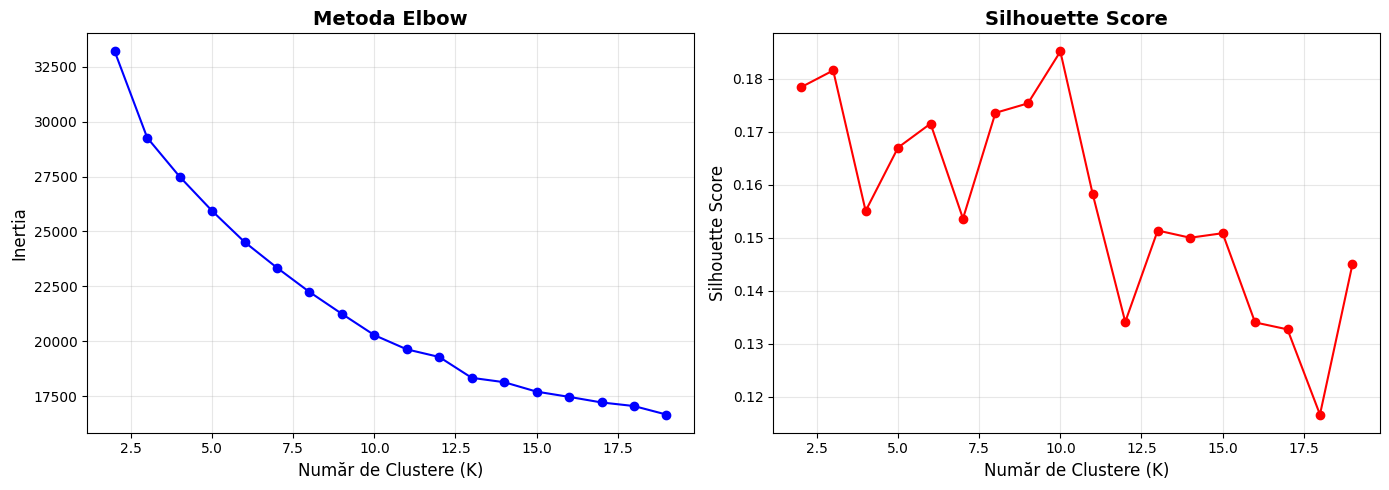

In [30]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_preprocessed)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_preprocessed, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertia_values, 'bo-')
axes[0].set_xlabel('Număr de Clustere (K)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Metoda Elbow', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Număr de Clustere (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_preprocessed)

df['ClusterLabel'] = cluster_labels

print(f"\nDistribuția clusterelor:")
print(pd.Series(cluster_labels).value_counts().sort_index())

print(f"\nStatistici SalePrice pe clustere:")
cluster_stats = df.groupby('ClusterLabel')['SalePrice'].describe()
print(cluster_stats)


Distribuția clusterelor:
0    613
1    608
2    239
Name: count, dtype: int64

Statistici SalePrice pe clustere:
              count           mean           std       min       25%  \
ClusterLabel                                                           
0             613.0  141964.137031  33598.383555   39300.0  122900.0   
1             608.0  243901.557566  80929.790264  124000.0  187500.0   
2             239.0  120622.523013  37263.107275   34900.0   97500.0   

                   50%       75%       max  
ClusterLabel                                
0             139900.0  159500.0  311500.0  
1             223250.0  275000.0  755000.0  
2             119900.0  140000.0  325000.0  


In [32]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_preprocessed)

df['ClusterLabel'] = cluster_labels

print(f"\nDistribuția clusterelor:")
print(pd.Series(cluster_labels).value_counts().sort_index())

print(f"\nStatistici SalePrice pe clustere:")
cluster_stats = df.groupby('ClusterLabel')['SalePrice'].describe()
print(cluster_stats)


Distribuția clusterelor:
0     80
1    353
2    221
3    541
4    265
Name: count, dtype: int64

Statistici SalePrice pe clustere:
              count           mean           std       min       25%  \
ClusterLabel                                                           
0              80.0  142256.425000  42376.853783   40000.0  120825.0   
1             353.0  203953.028329  39319.768617  127500.0  177500.0   
2             221.0  119811.687783  32300.108699   34900.0  100000.0   
3             541.0  141072.347505  33670.139000   39300.0  120500.0   
4             265.0  294228.264151  93068.598507  129000.0  232000.0   

                   50%       75%       max  
ClusterLabel                                
0             139500.0  167750.0  244600.0  
1             194201.0  225000.0  392500.0  
2             119900.0  139400.0  265979.0  
3             139000.0  158500.0  311500.0  
4             279500.0  335000.0  755000.0  


In [33]:
df_classification = df.drop('SalePrice', axis=1)
X_class = df_classification.drop('ClusterLabel', axis=1)
Y_class = df_classification['ClusterLabel']

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split( X_class, Y_class, test_size=0.2, random_state=42, stratify=Y_class)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nDistribuție train:\n{Y_train.value_counts().sort_index()}")
print(f"\nDistribuție test:\n{Y_test.value_counts().sort_index()}")


Train set: (1168, 31)
Test set: (292, 31)

Distribuție train:
ClusterLabel
0     64
1    282
2    177
3    433
4    212
Name: count, dtype: int64

Distribuție test:
ClusterLabel
0     16
1     71
2     44
3    108
4     53
Name: count, dtype: int64


In [12]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor_imputer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Clustering methods

In [ ]:
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor_imputer),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

cv_scores = cross_val_score(pipeline_dt, X_train, Y_train, cv=5, scoring='accuracy')
print(f"   CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

grid_search_dt = GridSearchCV( pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1 )

grid_search_dt.fit(X_train, Y_train)

print(f"\n   Best CV Accuracy: {grid_search_dt.best_score_:.4f}")
y_pred = grid_search_dt.predict(X_test)


accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(Y_test, y_pred))

c:\Users\dariu\Documents\GithubRepos\house-price-prediction-integra\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


   CV Accuracy: 0.8956 (+/- 0.0130)
Fitting 5 folds for each of 90 candidates, totalling 450 fits

   Best CV Accuracy: 0.8956
Test Accuracy: 0.9007

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.87      0.83      0.85        71
           2       1.00      0.98      0.99        44
           3       0.94      0.94      0.94       108
           4       0.76      0.85      0.80        53

    accuracy                           0.90       292
   macro avg       0.91      0.91      0.91       292
weighted avg       0.90      0.90      0.90       292



| Metric | K=3 | K=4 | K=5 |
|--------|-----|-----|-----|
| **CV Accuracy (mean)** | 0.9512 | 0.8904 | 0.8956 |
| **CV Accuracy (std)** | ±0.0147 | ±0.0170 | ±0.0130 |
| **Best CV Accuracy** | 0.9521 | 0.9058 | 0.8956 |
| **Test Accuracy** | **0.9452** | 0.8904 | 0.9007 |
| **GridSearch Combinations** | 450 fits | 450 fits | 450 fits |

---

## K=3 Clustere - Rezultate Detaliate

| Cluster | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0 | 0.92 | 0.96 | 0.94 | 123 |
| 1 | 0.96 | 0.91 | 0.93 | 121 |
| 2 | **0.98** | **1.00** | **0.99** | 48 |
| **Accuracy** | - | - | **0.95** | 292 |
| **Macro avg** | 0.95 | 0.96 | 0.95 | 292 |
| **Weighted avg** | 0.95 | 0.95 | 0.95 | 292 |

---

## K=4 Clustere - Rezultate Detaliate

| Cluster | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0 | 0.82 | 0.82 | 0.82 | 55 |
| 1 | 0.88 | 0.81 | 0.84 | 72 |
| 2 | 0.89 | 0.93 | 0.91 | 118 |
| 3 | **1.00** | **1.00** | **1.00** | 47 |
| **Accuracy** | - | - | **0.89** | 292 |
| **Macro avg** | 0.90 | 0.89 | 0.89 | 292 |
| **Weighted avg** | 0.89 | 0.89 | 0.89 | 292 |

---

## K=5 Clustere - Rezultate Detaliate

| Cluster | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0 | **1.00** | 0.94 | 0.97 | 16 |
| 1 | 0.87 | 0.83 | 0.85 | 71 |
| 2 | **1.00** | 0.98 | 0.99 | 44 |
| 3 | 0.94 | 0.94 | 0.94 | 108 |
| 4 | 0.76 | 0.85 | 0.80 | 53 |
| **Accuracy** | - | - | **0.90** | 292 |
| **Macro avg** | 0.91 | 0.91 | 0.91 | 292 |
| **Weighted avg** | 0.90 | 0.90 | 0.90 | 292 |



# Voting Classifiers


In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


logistic_reg = LogisticRegression(random_state=42,max_iter=2000, penalty='l2',solver='lbfgs')
decision_tree_class = DecisionTreeClassifier(random_state=42,splitter='random', min_samples_leaf=1, min_samples_split=10, min_impurity_decrease=0.0, max_features=None, max_depth=10, criterion='gini', class_weight = None)
random_forest_class = RandomForestClassifier(random_state=42,n_estimators=300, min_samples_leaf=1, min_samples_split=5, max_features='sqrt', max_depth=None, bootstrap=True)
knn_class = KNeighborsClassifier(weights='distance',p=1, n_neighbors=7, metric='manhattan')
xgboost_class = XGBClassifier(random_state=42,subsample=0.8, reg_lambda= 2, reg_alpha= 0.1, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0, colsample_bytree=0.9)
gradient_class = GradientBoostingClassifier(random_state=42,subsample=0.9, n_estimators=300, min_samples_leaf=1, min_samples_split=10, max_depth=3, learning_rate=0.1)
svm_class = SVC(random_state=42,probability=True, kernel='rbf', gamma=0.001, degree=2, C=100)
lightgbm_class = LGBMClassifier(random_state=42,subsample=0.8, reg_lambda=0.5, reg_alpha=0.1, num_leaves=50, n_estimators=200, min_child_samples=30, max_depth=-1, learning_rate=0.2, colsample_bytree=0.8)
catboost_class = CatBoostClassifier(random_state=42,learning_rate=0.1, l2_leaf_reg=1, iterations=200, depth=6, border_count=64, bagging_temperature=0.5,  verbose=0 )
voting_1 = VotingClassifier(
    estimators=[
        ('svm', svm_class),
        ('lr', logistic_reg),
        ('rfc', random_forest_class)
    ],
    voting='hard'
)

voting_2 = VotingClassifier(
    estimators=[
        ('svm', svm_class),
        ('lr', logistic_reg),
        ('xgb', xgboost_class),
    ],
    voting='soft'
)

voting_3 = VotingClassifier(
    estimators=[
        ('lr', logistic_reg),
        ('dt', decision_tree_class),
        ('knn', knn_class),
        ('svm', svm_class)

    ],
    voting='soft'
)


In [15]:
voting_1_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_imputer),
    ('voting_classifier', voting_1)
])

voting_2_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_imputer),
    ('voting_classifier', voting_2)
])

voting_3_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_imputer),
    ('voting_classifier', voting_3)
])

voting_1_pipeline.fit(X_train, Y_train)
Y_pred_voting_1 = voting_1_pipeline.predict(X_test)

voting_2_pipeline.fit(X_train, Y_train)
Y_pred_voting_2 = voting_2_pipeline.predict(X_test)

voting_3_pipeline.fit(X_train, Y_train)
Y_pred_voting_3 = voting_3_pipeline.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score

print("\n=== Voting 1 (hard) ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_voting_1):.5f}")
print(f"F1: {f1_score(Y_test, Y_pred_voting_1, average='weighted'):.5f}")
print(f"Precision: {precision_score(Y_test, Y_pred_voting_1, average='weighted'):.5f}")
print(f"Recall: {recall_score(Y_test, Y_pred_voting_1, average='weighted'):.5f}")

print(classification_report(Y_test, Y_pred_voting_1, digits=4))

print("\n=== Voting 2 (soft) ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_voting_2):.5f}")
print(f"F1: {f1_score(Y_test, Y_pred_voting_2, average='weighted'):.5f}")
print(f"Precision: {precision_score(Y_test, Y_pred_voting_2, average='weighted'):.5f}")
print(f"Recall: {recall_score(Y_test, Y_pred_voting_2, average='weighted'):.5f}")

print(classification_report(Y_test, Y_pred_voting_2, digits=4))


print("\n=== Voting 3 (soft) ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_voting_3):.5f}")
print(f"F1: {f1_score(Y_test, Y_pred_voting_3, average='weighted'):.5f}")
print(f"Precision: {precision_score(Y_test, Y_pred_voting_3, average='weighted'):.5f}")
print(f"Recall: {recall_score(Y_test, Y_pred_voting_3, average='weighted'):.5f}")

print(classification_report(Y_test, Y_pred_voting_3, digits=4))




=== Voting 1 (hard) ===
Accuracy: 0.97603
F1: 0.97595
Precision: 0.97608
Recall: 0.97603
              precision    recall  f1-score   support

           0     1.0000    0.9375    0.9677        16
           1     0.9718    0.9718    0.9718        71
           2     1.0000    1.0000    1.0000        44
           3     0.9727    0.9907    0.9817       108
           4     0.9615    0.9434    0.9524        53

    accuracy                         0.9760       292
   macro avg     0.9812    0.9687    0.9747       292
weighted avg     0.9761    0.9760    0.9760       292


=== Voting 2 (soft) ===
Accuracy: 0.97945
F1: 0.97933
Precision: 0.97950
Recall: 0.97945
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        16
           1     0.9714    0.9577    0.9645        71
           2     1.0000    1.0000    1.0000        44
           3     0.9730    1.0000    0.9863       108
           4     0.9804    0.9434    0.9615        53

    a

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_1_pipeline, X_class, Y_class, cv=5, scoring='accuracy')
print(f"Voting 1 accuracy CV mean: {scores.mean():.8f}")

scores = cross_val_score(voting_2_pipeline, X_class, Y_class, cv=5, scoring='accuracy')
print(f"Voting 2 accuracy CV mean: {scores.mean():.8f}")

scores = cross_val_score(voting_3_pipeline, X_class, Y_class, cv=5, scoring='accuracy')
print(f"Voting 3 accuracy CV mean: {scores.mean():.6f}")

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

results = {}
individual_models = {
    'logistic_reg': LogisticRegression(random_state=42,max_iter=2000, penalty='l2',solver='lbfgs'),
    'decision_tree_class': DecisionTreeClassifier(random_state=42,splitter='random', min_samples_leaf=1, min_samples_split=10, min_impurity_decrease=0.0, max_features=None, max_depth=10, criterion='gini', class_weight = None),
    'random_forest_class': RandomForestClassifier(random_state=42,n_estimators=300, min_samples_leaf=1, min_samples_split=5, max_features='sqrt', max_depth=None, bootstrap=True),
    'knn_class': KNeighborsClassifier(weights='distance',p=1, n_neighbors=7, metric='manhattan'),
    'xgboost_class': XGBClassifier(random_state=42,subsample=0.8, reg_lambda= 2, reg_alpha= 0.1, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0, colsample_bytree=0.9),
    'gradient_class': GradientBoostingClassifier(random_state=42,subsample=0.9, n_estimators=300, min_samples_leaf=1, min_samples_split=10, max_depth=3, learning_rate=0.1),
    'svm_class' : SVC(random_state=42,probability=True, kernel='rbf', gamma=0.001, degree=2, C=100),
#'lightgbm_class': LGBMClassifier(random_state=42,subsample=0.8, reg_lambda=0.5, reg_alpha=0.1, num_leaves=50, n_estimators=200, min_child_samples=30, max_depth=-1, learning_rate=0.2, colsample_bytree=0.8),
    'catboost_class': CatBoostClassifier(random_state=42,learning_rate=0.1, l2_leaf_reg=1, iterations=200, depth=6, border_count=64, bagging_temperature=0.5,  verbose=0 )
}
X_train_preprocessed = preprocessor_imputer.fit_transform(X_train)
X_test_preprocessed = preprocessor_imputer.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)
X_test_scaled = scaler.transform(X_test_preprocessed)

for name, model in individual_models.items():
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5)
    results[name] = {'accuracy': acc, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()}
    print(f"{name}: Accuracy={acc:.4f}, CV Mean={cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


logistic_reg: Accuracy=0.9589, CV Mean=0.9803 (+/- 0.0120)
decision_tree_class: Accuracy=0.9007, CV Mean=0.9033 (+/- 0.0043)
random_forest_class: Accuracy=0.9384, CV Mean=0.9469 (+/- 0.0189)
knn_class: Accuracy=0.9041, CV Mean=0.9144 (+/- 0.0197)
xgboost_class: Accuracy=0.9281, CV Mean=0.9606 (+/- 0.0095)
gradient_class: Accuracy=0.9349, CV Mean=0.9563 (+/- 0.0129)
svm_class: Accuracy=0.9726, CV Mean=0.9709 (+/- 0.0087)
catboost_class: Accuracy=0.9452, CV Mean=0.9623 (+/- 0.0142)


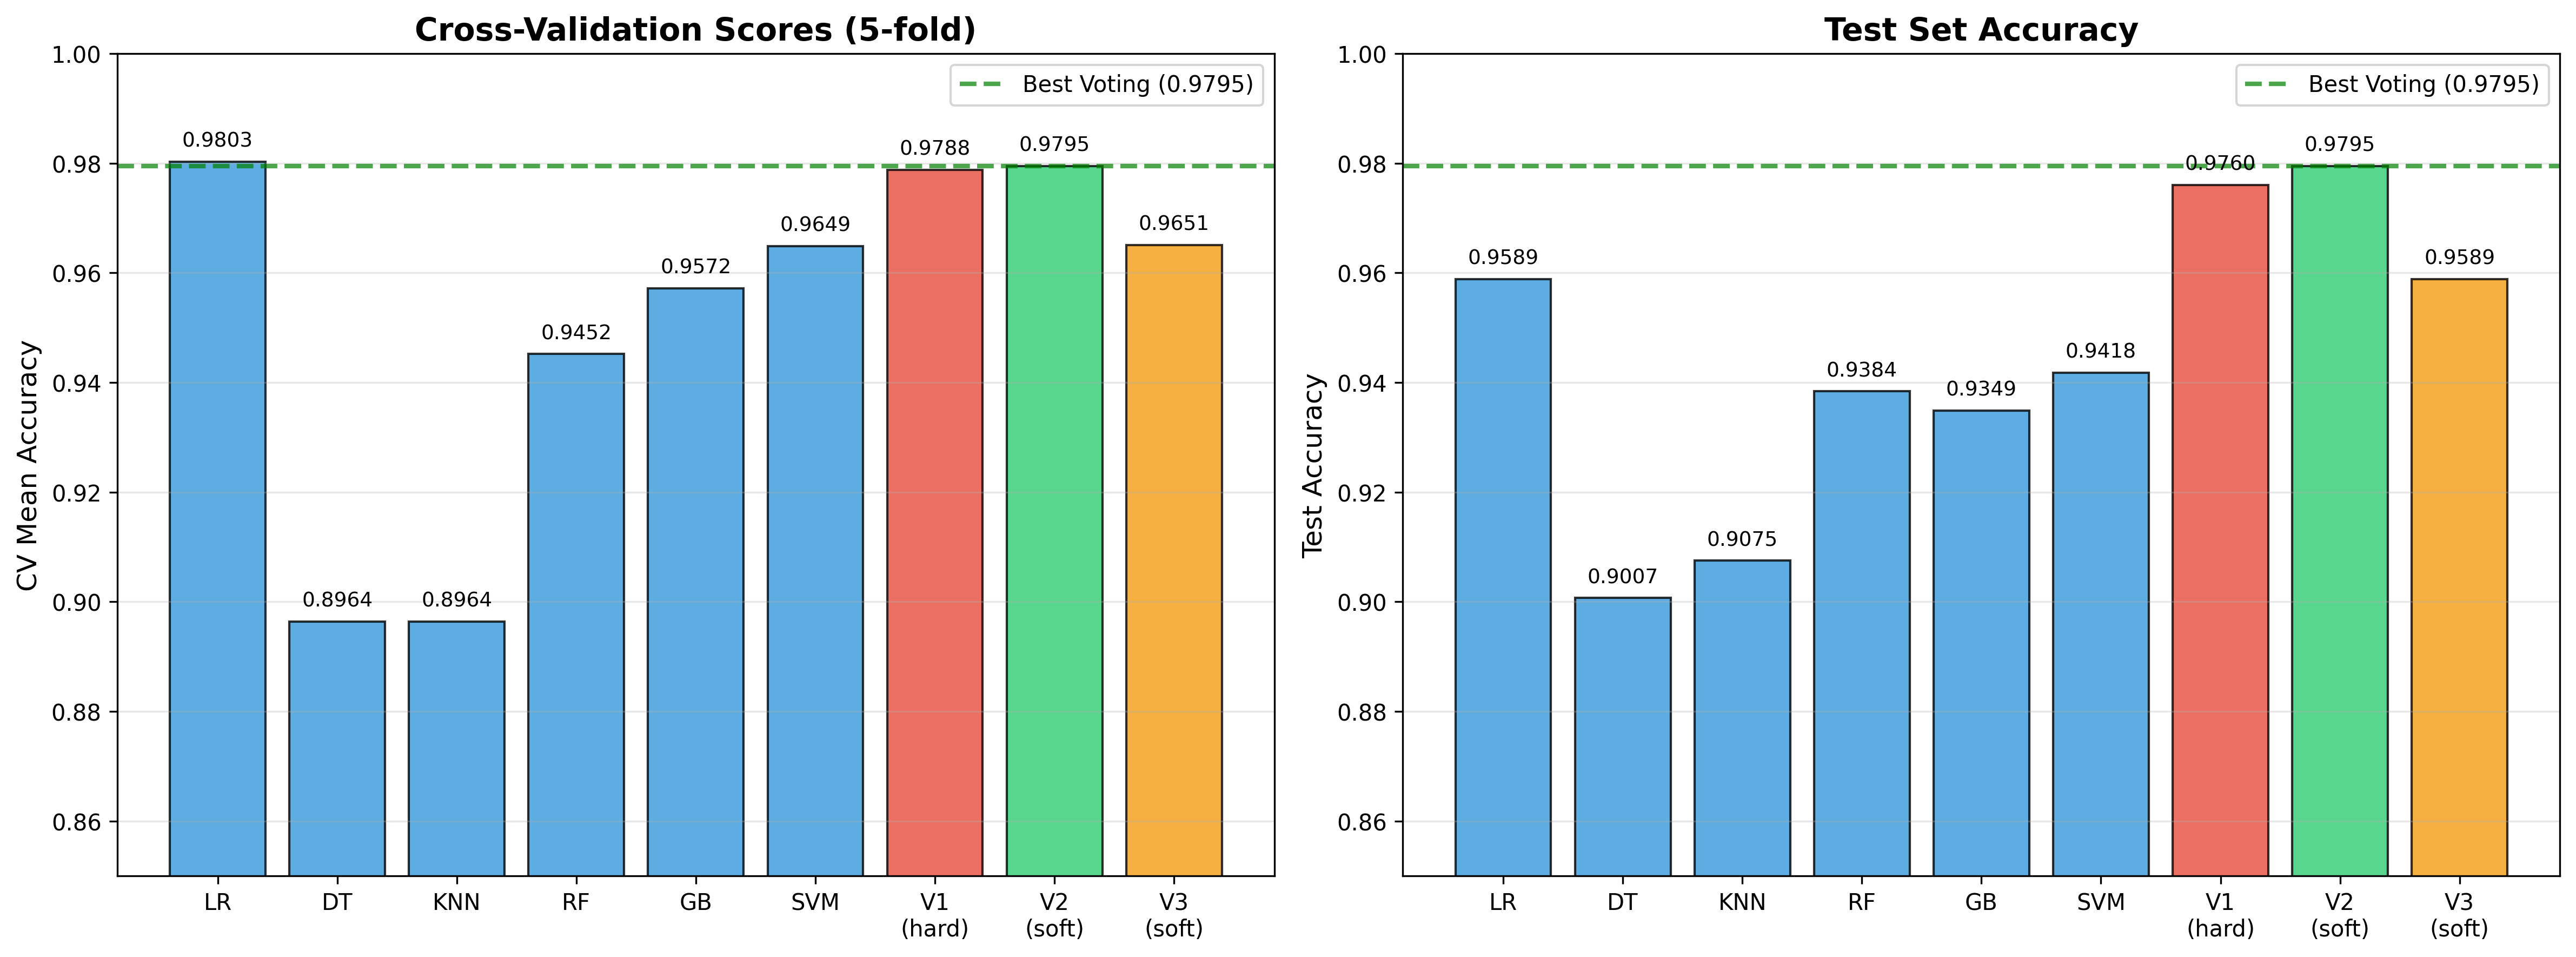

| Model                     | Accuracy (Test) | CV Mean | 
|---------------------------|-----------------|---------|
| Logistic Regression       | **0.9589**          | **0.9803**  | 
| Decision Tree             | 0.9007          | 0.8964  | 
| KNN                       | 0.9075          | 0.8964  |  
| Random Forest             | 0.9384          | 0.9452  |  
| Gradient Boosting         | 0.9349          | 0.9572  | 
| SVM                       | 0.9418          | 0.9649  |  

| Voting Classifier         | Accuracy (Test) | CV Mean | 
|---------------------------|-----------------|---------|
| Voting 1 (Hard)           | 0.9760          | 0.9788  | 
| Voting 2 (Soft)           | **0.9795**      | **0.9795** | 
| Voting 3 (Soft)           | 0.9589          | 0.9651  | 

## A îmbunătățit VotingClassifier rezultatele?

Da.
Toate cele trei variante de VotingClassifier au obținut **acuratețe mai mare decât majoritatea modelelor individuale**:

* **Cea mai bună combinație individuală** are

  * Logistic Regression: **Accuracy = 0.9589**, CV mean ≈ **0.9803**
* Ensembles:

  * **Voting 1 (hard)**: Accuracy ≈ **0.9760**, CV mean ≈ **0.9788**
  * **Voting 2 (soft)**: Accuracy ≈ **0.9795**, CV mean ≈ **0.9795**
  * **Voting 3 (soft)**: Accuracy ≈ **0.9589**, CV mean ≈ **0.9651**

Deci, în practică, **VotingClassifier a îmbunătățit rezultatele față de fiecare model folosit separat** (în special față de Decision Tree, KNN, Random Forest, Gradient Boosting).

 **Concluzie.**
 * VotingClassifier a îmbunătățit rezultatele față de majoritatea modelelor individuale.
 * Cea mai bună performanță a fost obținută de combinația **Voting 2 (soft)**, cu o acuratețe de aproximativ 0.98 și un scor F1 similar, depășind atât Voting 1 (hard), cât și Voting 3, dar și clasificatorii individuali.

* Soft voting funcționează mai bine deoarece combină informația probabilistică furnizată de mai multe modele,  iar erorile fiecărui model tind să se compenseze. În schimb, Voting 3 include și modele mai slabe, care duc la o scădere a performanței ensemble-ului.


# StackingClassifier


In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split( X_class, Y_class, test_size=0.4, random_state=42, stratify=Y_class)
X_test, X_val, Y_test, Y_val = train_test_split( X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Validation set: {X_val.shape}")
print(f"\nDistribuție train:\n{Y_train.value_counts().sort_index()}")
print(f"\nDistribuție test:\n{Y_test.value_counts().sort_index()}")
print(f"\nDistribuție validation:\n{Y_val.value_counts().sort_index()}")

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor_class = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
base_estimators_1 = [
    ('lr', LogisticRegression(random_state=42, max_iter=2000, penalty='l2', solver='lbfgs')),
    ('rf', RandomForestClassifier(random_state=42, n_estimators=300, min_samples_leaf=1, min_samples_split=5, max_features='sqrt', max_depth=None, bootstrap=True)),
    ('svm', SVC(random_state=42, probability=True, kernel='rbf', gamma=0.001, degree=2, C=100))
]

base_estimators_2 = [
    ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss')),
    ('gradient', GradientBoostingClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression())
]

base_estimators_3 = [
    ('catboost', CatBoostClassifier(random_state=42, verbose=0)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss'))
]

In [ ]:
stacking_pipelines = {
    'Stacking 1': Pipeline([
        ('preprocessor', preprocessor_class),
        ('stacking', StackingClassifier(
            estimators=base_estimators_1,
            final_estimator=LogisticRegression(random_state=42),
            cv=5
        ))
    ]),

    'Stacking 2': Pipeline([
        ('preprocessor', preprocessor_class),
        ('stacking', StackingClassifier(
            estimators=base_estimators_2,
            final_estimator=LogisticRegression(random_state=42),
            cv=5
        ))
    ]),

    'Stacking 3': Pipeline([
        ('preprocessor', preprocessor_class),
        ('stacking', StackingClassifier(
            estimators=base_estimators_3,
            final_estimator=XGBClassifier(random_state=42, eval_metric='mlogloss'),
            cv=5
        ))
    ])
}

In [ ]:
param_grids = {
    'Stacking 1': {
        'stacking__lr__C': [0.1],
        'stacking__lr__penalty': ['l2'],
        'stacking__rf__n_estimators': [200],
        'stacking__rf__max_depth': [20],
        'stacking__svm__C': [1],
        'stacking__svm__kernel': ['rbf'],
        'stacking__svm__gamma': [0.01],
        'stacking__final_estimator__C': [1.0]
    },

    'Stacking 2': {
        'stacking__xgb__n_estimators': [100],
        'stacking__xgb__max_depth': [3, 5],
        'stacking__xgb__learning_rate': [0.1],
        'stacking__gradient__n_estimators': [100],
        'stacking__gradient__max_depth': [3, 5],
        'stacking__gradient__learning_rate': [0.1],
        'stacking__knn__n_neighbors': [5, 7, 9],
        'stacking__knn__weights': ['uniform'],
        'stacking__final_estimator__C': [0.1, 1.0]
    },

    'Stacking 3': {
        'stacking__catboost__iterations': [100, 200],
        'stacking__catboost__depth': [4, 6],
        'stacking__catboost__learning_rate': [0.05, 0.1],
        'stacking__rf__n_estimators': [100, 200],
        'stacking__rf__max_depth': [10, 20],
        'stacking__xgb__n_estimators': [100, 200],
        'stacking__xgb__max_depth': [3, 5],
        'stacking__final_estimator__n_estimators': [50, 100],
        'stacking__final_estimator__max_depth': [3]
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

results = {}
for model_name, pipeline in stacking_pipelines.items():
    print(f"\n{'='*70}")
    print(f"TUNING: {model_name}")
    print(f"{'='*70}")

    n_combinations = len(list(ParameterGrid(param_grids[model_name])))
    print(f"Număr combinații: {n_combinations}")
    print(f"Total fits (CV=5): {n_combinations * 5}")

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=1, verbose=1, error_score='raise' )

    grid.fit(X_train, Y_train)

    print(f"\nBest params: {grid.best_params_}")
    print(f"Best CV Accuracy: {grid.best_score_:.4f}")
    best_model = grid.best_estimator_

    Y_train_pred = best_model.predict(X_train)
    Y_val_pred = best_model.predict(X_val)
    Y_test_pred = best_model.predict(X_test)

    train_acc = accuracy_score(Y_train, Y_train_pred)
    val_acc = accuracy_score(Y_val, Y_val_pred)
    test_acc = accuracy_score(Y_test, Y_test_pred)

    train_f1 = f1_score(Y_train, Y_train_pred, average='weighted')
    val_f1 = f1_score(Y_val, Y_val_pred, average='weighted')
    test_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

    print(f"\n{'─'*70}")
    print(f"Rezultate - {model_name}")
    print(f"{'─'*70}")
    print(f"\nTrain Set (60%):")
    print(f" Accuracy: {train_acc:.4f}, F1: {train_f1:.4f}")
    print(f"\n Validation Set (20%):")
    print(f" Accuracy: {val_acc:.4f}, F1: {val_f1:.4f}")
    print(f"\n Test Set (20%):")
    print(f" Accuracy: {test_acc:.4f}, F1: {test_f1:.4f}")

    acc_diff_val_test = val_acc - test_acc
    acc_diff_train_val = train_acc - val_acc

    print(f"\n{'─'*70}")
    print(f" Analiza generalizare")
    print(f"{'─'*70}")
    print(f"   Δ Accuracy (Val - Test): {acc_diff_val_test:+.4f}")
    print(f"   Δ Accuracy (Train - Val): {acc_diff_train_val:+.4f}")

    print(f"\n Classification Report (Test):")
    print(classification_report(Y_test, Y_test_pred, digits=4))

    cm = confusion_matrix(Y_test, Y_test_pred)
    print(f"\n Confusion Matrix (Test):")
    print(cm)

    per_class_acc = cm.diagonal() / cm.sum(axis=1)
    print(f"\n Per-Class Accuracy:")
    for i, acc in enumerate(per_class_acc):
        print(f"   Class {i}: {acc:.4f}")

    results[model_name] = {
        'best_params': grid.best_params_,
        'best_cv_score': grid.best_score_,
        'train_acc': train_acc,
        'val_acc': val_acc,
        'test_acc': test_acc,
        'train_f1': train_f1,
        'val_f1': val_f1,
        'test_f1': test_f1,
        'acc_diff_val_test': acc_diff_val_test,
        'acc_diff_train_val': acc_diff_train_val,
        'best_model': best_model,
        'confusion_matrix': cm,
        'per_class_accuracy': per_class_acc,
        'cv_results': grid.cv_results_
    }


print(f"\n{'='*70}")
print(f" COMPARAȚIE FINALĂ - TOATE MODELELE")
print(f"{'='*70}\n")

comparison_data = []
for model_name, result in results.items():
        comparison_data.append({
            'Model': model_name,
            'CV Score': result['best_cv_score'],
            'Train Acc': result['train_acc'],
            'Val Acc': result['val_acc'],
            'Test Acc': result['test_acc'],
            'Test F1': result['test_f1'],
            'Δ(Val-Test)': result['acc_diff_val_test'],
            'Δ(Train-Val)': result['acc_diff_train_val']
        })

if comparison_data:
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df = comparison_df.sort_values('Test Acc', ascending=False)

    print(comparison_df.to_string(index=False))
    best_model_name = comparison_df.iloc[0]['Model']
    best_test_acc = comparison_df.iloc[0]['Test Acc']

    print(f"\n{'='*70}")
    print(f" BEST MODEL: {best_model_name}")
    print(f"   Test Accuracy: {best_test_acc:.4f}")
    print(f"{'='*70}\n")
    if hasattr(results[best_model_name]['best_model'], 'feature_importances_'):
        print(f" Feature Importances ({best_model_name}):")
        importances = results[best_model_name]['best_model'].feature_importances_
        feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(len(importances))]

        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False).head(10)

        print(importance_df.to_string(index=False))


TUNING: Stacking 1
Număr combinații: 1
Total fits (CV=5): 5
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best params: {'stacking__final_estimator__C': 1.0, 'stacking__lr__C': 0.1, 'stacking__lr__penalty': 'l2', 'stacking__rf__max_depth': 20, 'stacking__rf__n_estimators': 200, 'stacking__svm__C': 1, 'stacking__svm__gamma': 0.01, 'stacking__svm__kernel': 'rbf'}
Best CV Accuracy: 0.9806

──────────────────────────────────────────────────────────────────────
REZULTATE - Stacking 1
──────────────────────────────────────────────────────────────────────

Train Set (60%):
   Accuracy: 0.9966, F1: 0.9966

 Validation Set (20%):
   Accuracy: 0.9692, F1: 0.9692

 Test Set (20%):
   Accuracy: 0.9658, F1: 0.9658

──────────────────────────────────────────────────────────────────────
 ANALIZĂ GENERALIZARE
──────────────────────────────────────────────────────────────────────
   Δ Accuracy (Val - Test): +0.0034
   Δ Accuracy (Train - Val): +0.0274

 Classification Report (Test):
     

## Comparație Finală - Stacking Classifiers

| Model | Train Acc | Val Acc | Test Acc | Test F1 | CV Score | Δ(Val-Test) | Δ(Train-Val) | 
|:------|:---------:|:-------:|:--------:|:-------:|:--------:|:-----------:|:------------:|
| **Stacking 1** | 0.9966 | 0.9692 | **0.9658** | **0.9658** | **0.9806** | +0.0034 | +0.0274 |
| Stacking 2 | 1.0000 | 0.9658 | 0.9658 | 0.9656 | 0.9737 | +0.0000 | +0.0342 |

---

## Cel Mai Bun Model - Stacking 1

| Metric | Valoare |
|:-------|:-------:|
| **Test Accuracy** | 0.9658 | 
| **Test F1 Score** | 0.9658 | 
| **Validation Accuracy** | 0.9692 | 
| **CV Score (5-fold)** | 0.9806 | 
| **Generalization Gap** | 0.0034 |
| **Overfitting Gap** | 0.0274 |

### Componente Stacking 1:
| Base Estimator | Configurație |
|:---------------|:-------------|
| Logistic Regression | `C=0.1, penalty='l2'` |
| Random Forest | `n_estimators=200, max_depth=20` |
| SVM | `C=1, kernel='rbf', gamma=0.01` |
| **Final Estimator** | LogisticRegression (`C=1.0`) |

---

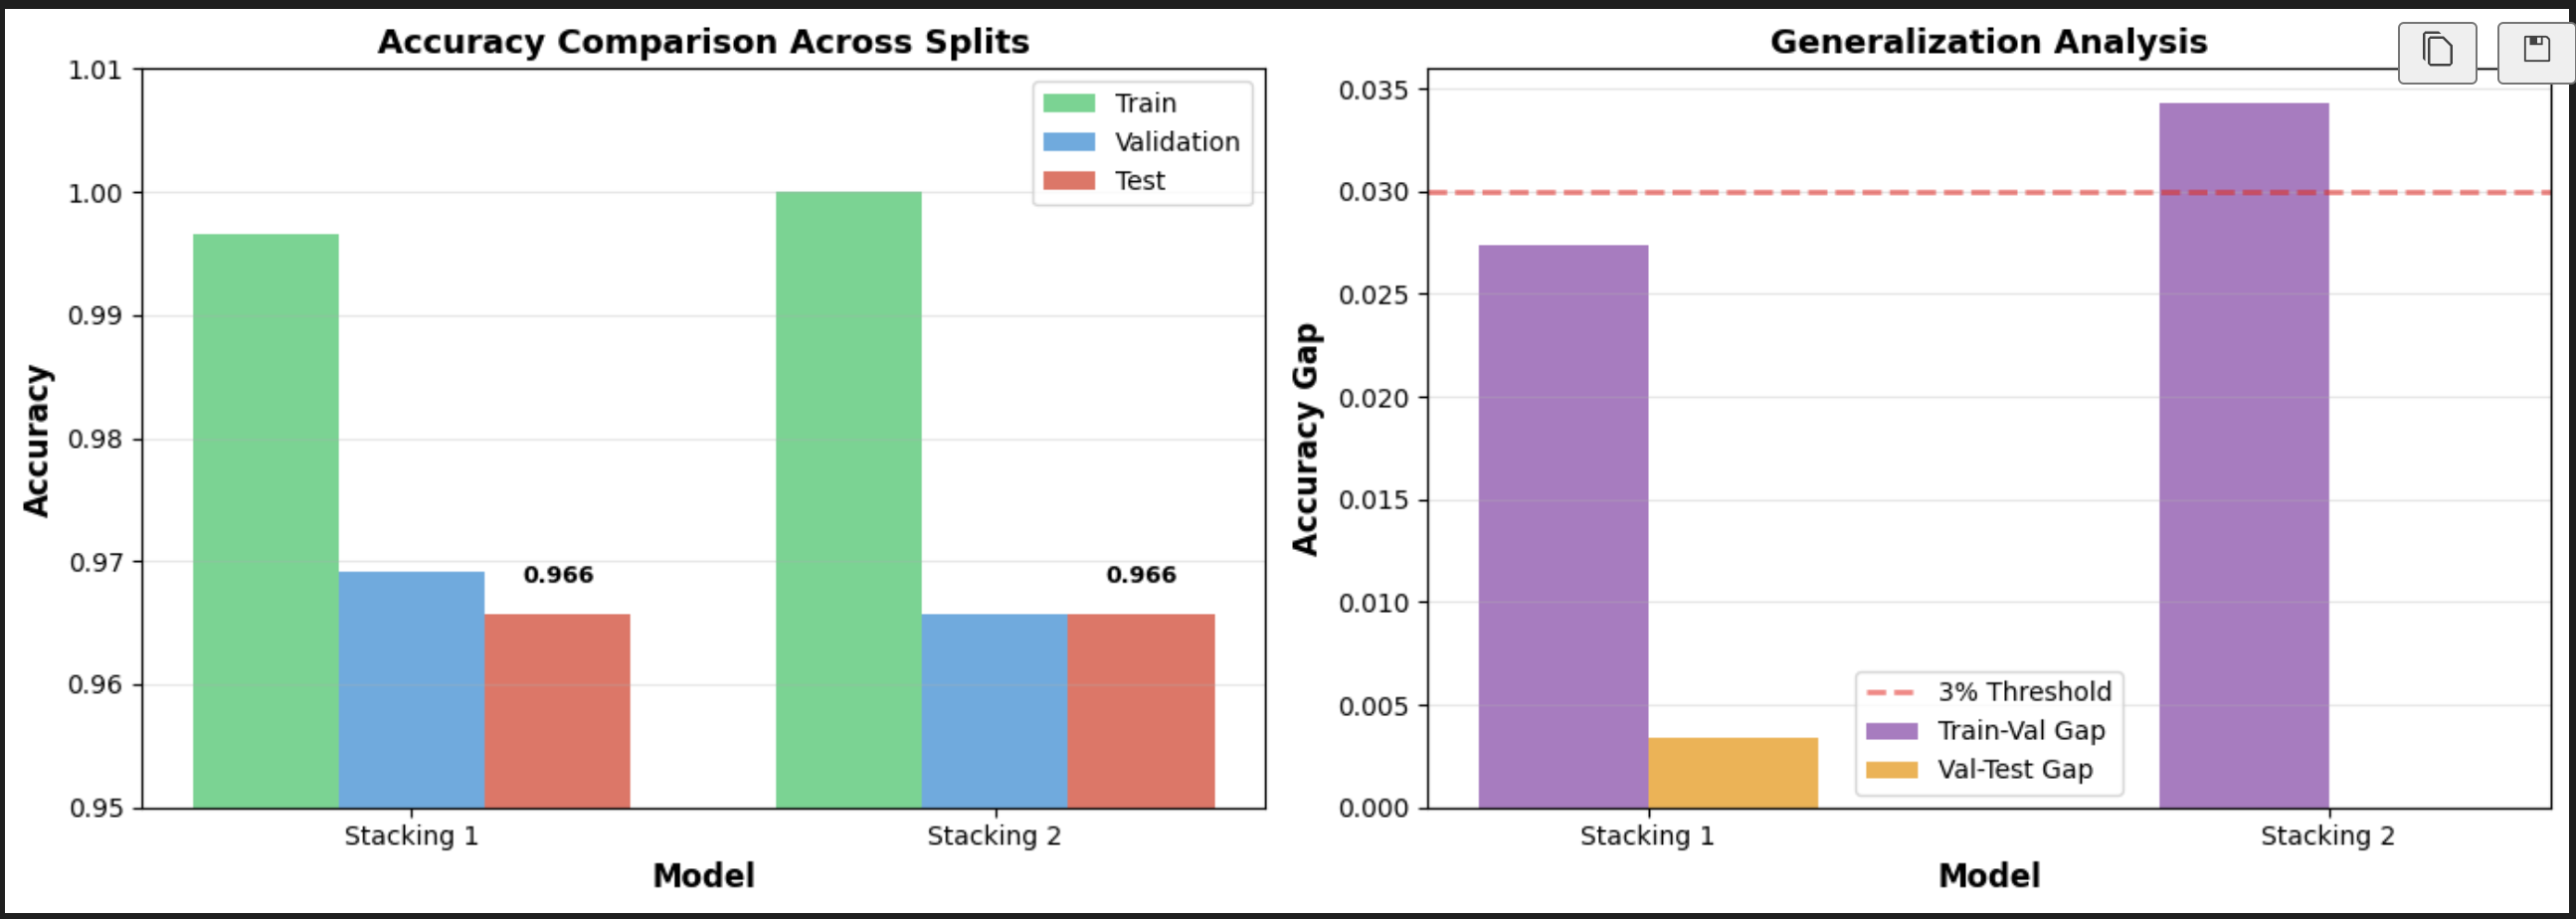

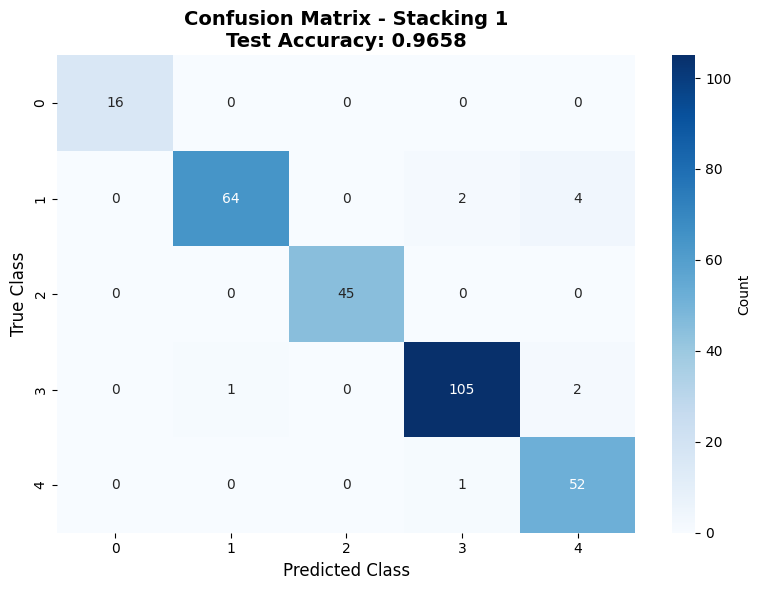

## Analiză Per-Clasă - Stacking 1

| Clasă | Precision | Recall | F1-Score | Support | Accuracy |
|:-----:|:---------:|:------:|:--------:|:-------:|:--------:|
| **0** | 1.0000 | 1.0000 | 1.0000 | 16 | 1.0000 |
| **1** | 0.9846 | 0.9143 | 0.9481 | 70 | 0.9143 |
| **2** | 1.0000 | 1.0000 | 1.0000 | 45 | 1.0000 |
| **3** | 0.9722 | 0.9722 | 0.9722 | 108 | 0.9722 |
| **4** | 0.8966 | 0.9811 | 0.9369 | 53 | 0.9811 |


# Laboratory 5 December on Classification methods ( SHAP & Permutation Importance )

In [1]:
import shap
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [16]:
voting_2_pipeline.fit(X_train, Y_train)
Y_pred = voting_2_pipeline.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
f1_score_value = f1_score(Y_test, Y_pred, average='weighted')

print(f"\nAccuracy: {accuracy:.4f}")
print(f"F1 macro: {f1_score_value:.4f}")
print("\nClassification report:\n")
print(classification_report(Y_test, Y_pred))



Accuracy: 0.9795
F1 macro: 0.9793

Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.97      0.96      0.96        71
           2       1.00      1.00      1.00        44
           3       0.97      1.00      0.99       108
           4       0.98      0.94      0.96        53

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292



In [35]:
preprocessor = voting_2_pipeline.named_steps['preprocessor']
voting_classifier = voting_2_pipeline.named_steps['voting_classifier']

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

numeric_feature_names = list(numerical_features)
onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
categorical_feature_names = list(onehot_encoder.get_feature_names_out(categorical_features))

feature_names = numeric_feature_names + categorical_feature_names
print(f"Total features after preprocessing: {len(feature_names)}")

X_train_df = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_df = pd.DataFrame(X_test_preprocessed, columns=feature_names)

Total features after preprocessing: 40



PERMUTATION IMPORTANCE pentru Voting 2...


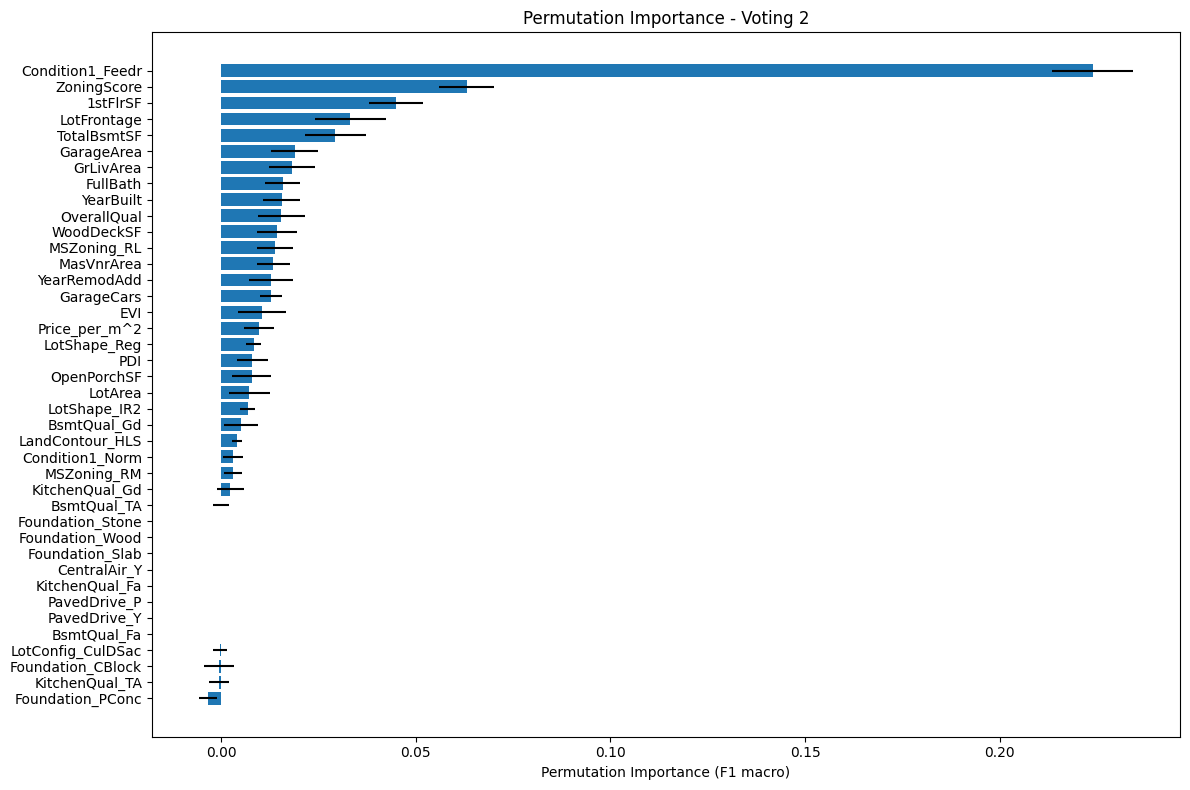

In [18]:
print("\n" + "="*70)
print("PERMUTATION IMPORTANCE pentru Voting 2...")
print("="*70)

perm_result = permutation_importance( voting_classifier, X_test_preprocessed, Y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring='f1_weighted' )
permutation_importance = perm_result.importances_mean
persmutation_std = perm_result.importances_std
sorted_permutation_index = permutation_importance.argsort()

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(range(len(sorted_permutation_index)), permutation_importance[sorted_permutation_index], xerr=persmutation_std[sorted_permutation_index])
ax.set_yticks(range(len(sorted_permutation_index)))
ax.set_yticklabels(np.array(feature_names)[sorted_permutation_index])
ax.set_xlabel("Permutation Importance (F1 macro)")
ax.set_title("Permutation Importance - Voting 2")
plt.tight_layout()
plt.show()


SHAP ANALYSIS - pentru fiecare model din Voting 2

1. XGBoost (TreeExplainer)...
Tip output: <class 'numpy.ndarray'>
Shape: (292, 40, 5)


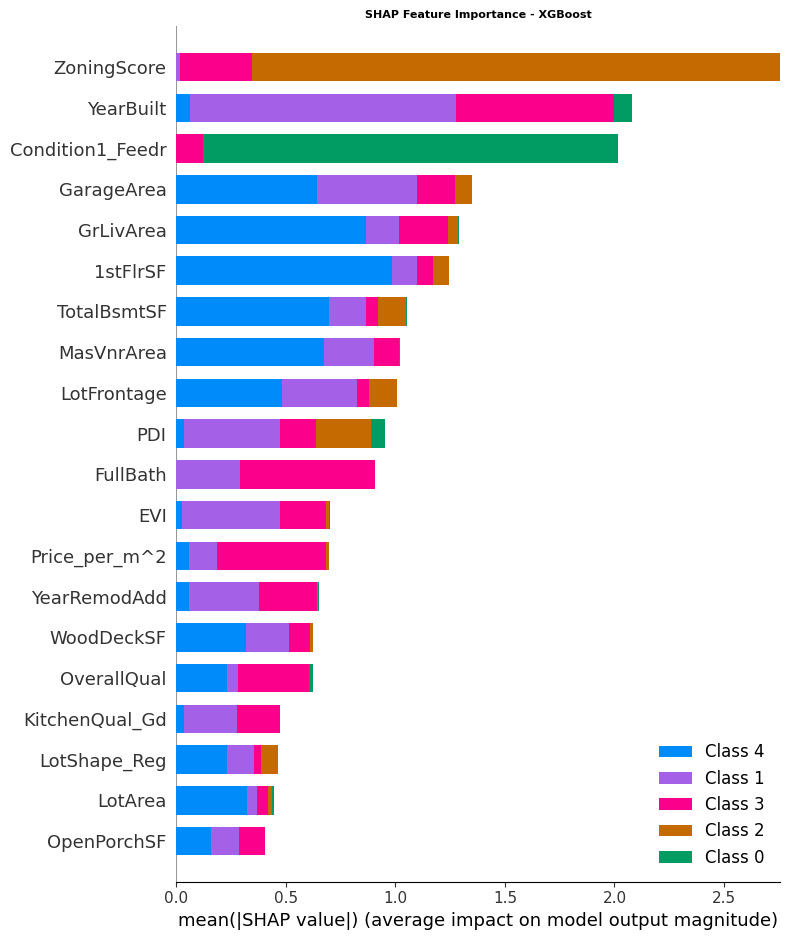


2. Logistic Regression (LinearExplainer)...
Tip output: <class 'numpy.ndarray'>
Shape: (292, 40, 5)


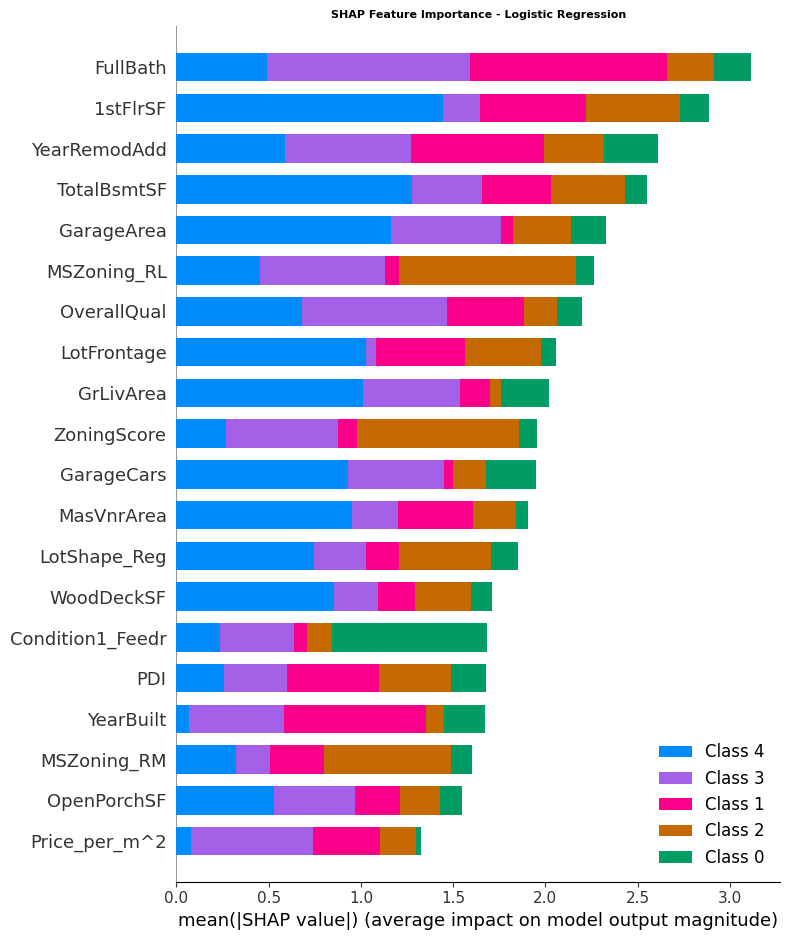


3. SVM (KernelExplainer)...
Calculez SHAP pentru 50 samples (din 292)...


  0%|          | 0/50 [00:00<?, ?it/s]

Tip output: <class 'numpy.ndarray'>
Shape: (50, 40, 5)


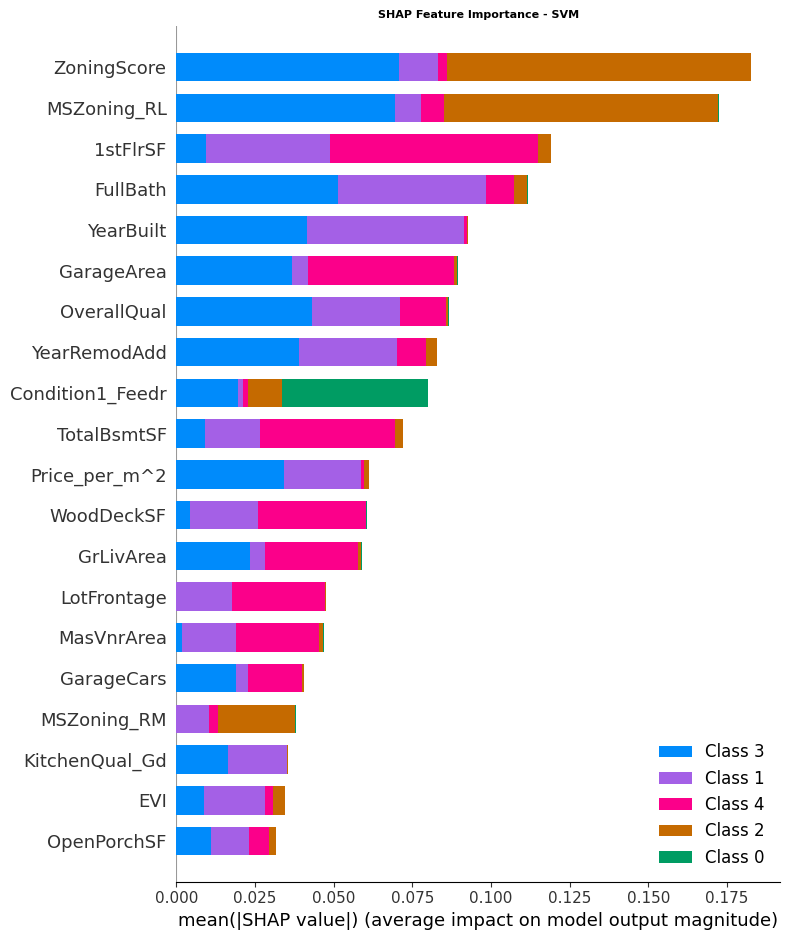

In [40]:
print("\n" + "="*70)
print("SHAP ANALYSIS - pentru fiecare model din Voting 2")
print("="*70)

print("\n1. XGBoost (TreeExplainer)...")

xgb_model = voting_classifier.named_estimators_['xgb']
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test_preprocessed)

print(f"Tip output: {type(shap_values_xgb)}")
print(f"Shape: {shap_values_xgb.shape}")


plt.figure(figsize=(6, 5))
shap.summary_plot(shap_values_xgb, X_test_df, feature_names=feature_names, plot_type="bar", show=False, max_display=20)
plt.title("SHAP Feature Importance - XGBoost", fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()


print("\n2. Logistic Regression (LinearExplainer)...")

lr_model = voting_classifier.named_estimators_['lr']
explainer_lr = shap.LinearExplainer(lr_model, X_train_preprocessed)
shap_values_lr = explainer_lr.shap_values(X_test_preprocessed)

print(f"Tip output: {type(shap_values_lr)}")
print(f"Shape: {shap_values_lr.shape}")


plt.figure(figsize=(6, 5))
shap.summary_plot(shap_values_lr, X_test_df, feature_names=feature_names,plot_type="bar", show=False, max_display=20)
plt.title("SHAP Feature Importance - Logistic Regression", fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n3. SVM (KernelExplainer)...")

svm_model = voting_classifier.named_estimators_['svm']
background = shap.sample(X_train_preprocessed, 100)
explainer_svm = shap.KernelExplainer(svm_model.predict_proba, background)

sample_svm = shap.sample(X_test_preprocessed, 50)
print(f"Calculez SHAP pentru {len(sample_svm)} samples (din {len(X_test_preprocessed)})...")
shap_values_svm = explainer_svm.shap_values(sample_svm)

print(f"Tip output: {type(shap_values_svm)}")
print(f"Shape: {shap_values_svm.shape}")


plt.figure(figsize=(6, 5))
shap.summary_plot(shap_values_svm, X_test_preprocessed, feature_names=feature_names, plot_type="bar", show=False, max_display=20)
plt.title("SHAP Feature Importance - SVM", fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()

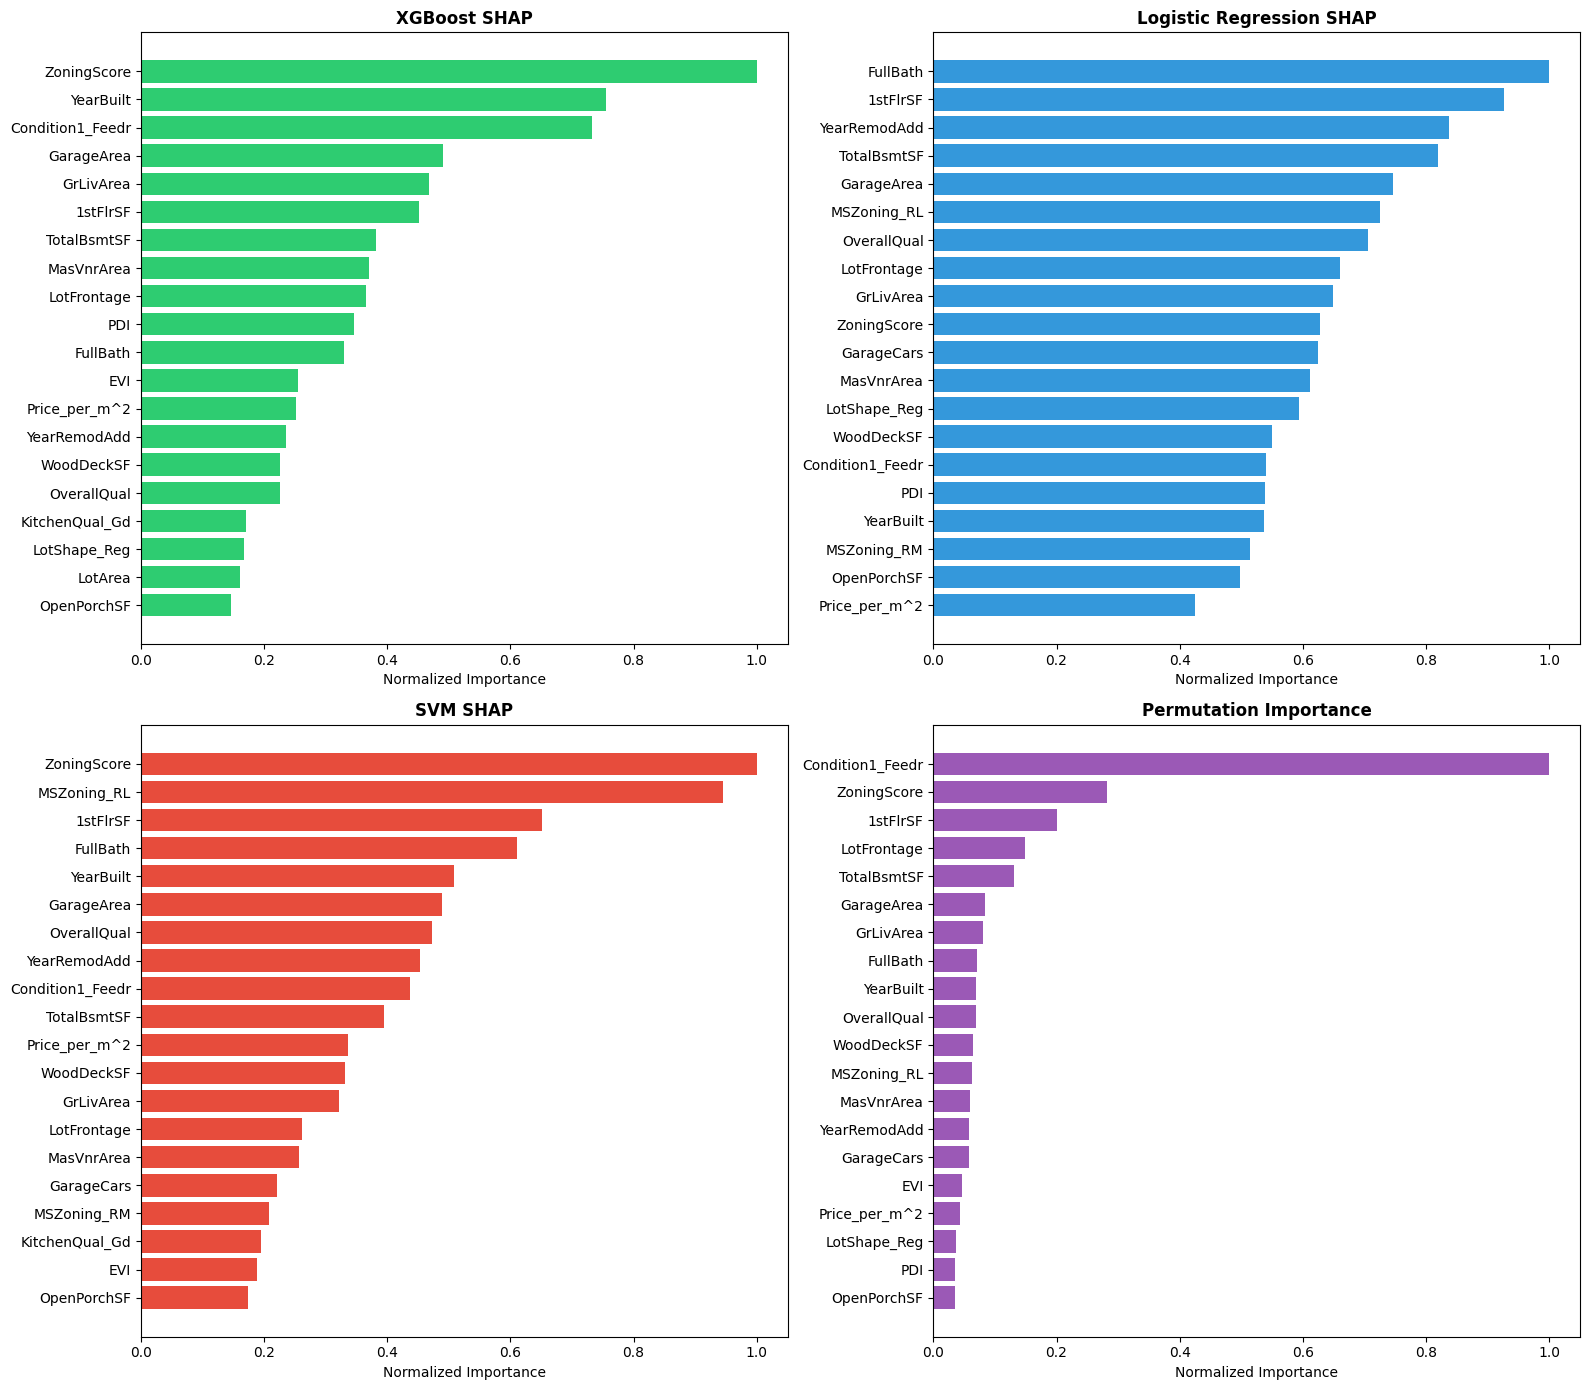

In [42]:
def calculate_mean_shap_importance(shap_values):
        return np.abs(shap_values).mean(axis=(0, 2))

shap_importance_xgb = np.abs(shap_values_xgb).mean(axis=(0, 2))
shap_importance_lr = np.abs(shap_values_lr).mean(axis=(0, 2))
shap_importance_svm = np.abs(shap_values_svm).mean(axis=(0, 2))

comparison_df = pd.DataFrame({
    'Feature': feature_names,
    'XGBoost': shap_importance_xgb,
    'LogisticRegression': shap_importance_lr,
    'SVM': shap_importance_svm,
    'PermutationImportance': permutation_importance
})

# Normalizează
for col in ['XGBoost', 'LogisticRegression', 'SVM', 'PermutationImportance']:
    comparison_df[f'{col}_norm'] = comparison_df[col] / comparison_df[col].max()

# Grafic comparativ - Top 15 features
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# XGBoost
top_xgb = comparison_df.nlargest(20, 'XGBoost')
axes[0, 0].barh(range(20), top_xgb['XGBoost_norm'].values[::-1], color='#2ecc71')
axes[0, 0].set_yticks(range(20))
axes[0, 0].set_yticklabels(top_xgb['Feature'].values[::-1])
axes[0, 0].set_title('XGBoost SHAP', fontweight='bold')
axes[0, 0].set_xlabel('Normalized Importance')

# Logistic Regression
top_lr = comparison_df.nlargest(20, 'LogisticRegression')
axes[0, 1].barh(range(20), top_lr['LogisticRegression_norm'].values[::-1], color='#3498db')
axes[0, 1].set_yticks(range(20))
axes[0, 1].set_yticklabels(top_lr['Feature'].values[::-1])
axes[0, 1].set_title('Logistic Regression SHAP', fontweight='bold')
axes[0, 1].set_xlabel('Normalized Importance')

# SVM
top_svm = comparison_df.nlargest(20, 'SVM')
axes[1, 0].barh(range(20), top_svm['SVM_norm'].values[::-1], color='#e74c3c')
axes[1, 0].set_yticks(range(20))
axes[1, 0].set_yticklabels(top_svm['Feature'].values[::-1])
axes[1, 0].set_title('SVM SHAP', fontweight='bold')
axes[1, 0].set_xlabel('Normalized Importance')

# Permutation Importance
top_perm = comparison_df.nlargest(20, 'PermutationImportance')
axes[1, 1].barh(range(20), top_perm['PermutationImportance_norm'].values[::-1], color='#9b59b6')
axes[1, 1].set_yticks(range(20))
axes[1, 1].set_yticklabels(top_perm['Feature'].values[::-1])
axes[1, 1].set_title('Permutation Importance', fontweight='bold')
axes[1, 1].set_xlabel('Normalized Importance')

plt.tight_layout()
plt.show()

In [43]:
print("\nTop 10 Features per Model:")
print("-" * 50)
for model_name, col in [('XGBoost', 'XGBoost'), ('Logistic Regression', 'LogisticRegression'),  ('SVM', 'SVM'), ('Permutation Imp.', 'PermutationImportance')]:
    top10 = comparison_df.nlargest(10, col)['Feature'].tolist()
    print(f"\n{model_name}:")
    for i, f in enumerate(top10, 1):
        print(f"  {i}. {f}")


Top 10 Features per Model:
--------------------------------------------------

XGBoost:
  1. ZoningScore
  2. YearBuilt
  3. Condition1_Feedr
  4. GarageArea
  5. GrLivArea
  6. 1stFlrSF
  7. TotalBsmtSF
  8. MasVnrArea
  9. LotFrontage
  10. PDI

Logistic Regression:
  1. FullBath
  2. 1stFlrSF
  3. YearRemodAdd
  4. TotalBsmtSF
  5. GarageArea
  6. MSZoning_RL
  7. OverallQual
  8. LotFrontage
  9. GrLivArea
  10. ZoningScore

SVM:
  1. ZoningScore
  2. MSZoning_RL
  3. 1stFlrSF
  4. FullBath
  5. YearBuilt
  6. GarageArea
  7. OverallQual
  8. YearRemodAdd
  9. Condition1_Feedr
  10. TotalBsmtSF

Permutation Imp.:
  1. Condition1_Feedr
  2. ZoningScore
  3. 1stFlrSF
  4. LotFrontage
  5. TotalBsmtSF
  6. GarageArea
  7. GrLivArea
  8. FullBath
  9. YearBuilt
  10. OverallQual


## Top 10 Features per Model - Comparison

| Rank | XGBoost | Logistic Regression | SVM | Permutation Importance |
|:----:|:--------|:--------------------|:----|:-----------------------|
| 1 | ZoningScore | FullBath | ZoningScore | Condition1_Feedr |
| 2 | YearBuilt | 1stFlrSF | MSZoning_RL | ZoningScore |
| 3 | Condition1_Feedr | YearRemodAdd | 1stFlrSF | 1stFlrSF |
| 4 | GarageArea | TotalBsmtSF | FullBath | LotFrontage |
| 5 | GrLivArea | GarageArea | YearBuilt | TotalBsmtSF |
| 6 | 1stFlrSF | MSZoning_RL | GarageArea | GarageArea |
| 7 | TotalBsmtSF | OverallQual | OverallQual | GrLivArea |
| 8 | MasVnrArea | LotFrontage | YearRemodAdd | FullBath |
| 9 | LotFrontage | GrLivArea | Condition1_Feedr | YearBuilt |
| 10 | PDI | ZoningScore | TotalBsmtSF | OverallQual |


## Feature Frequency Analysis

| Feature | XGBoost | Logistic Regression | SVM | Permutation | **Total Appearances** |
|:--------|:-------:|:-------------------:|:---:|:-----------:|:---------------------:|
| **ZoningScore** | ✅ | ✅ | ✅ | ✅ | **4/4**  |
| **1stFlrSF** | ✅ | ✅ | ✅ | ✅ | **4/4**  |
| **GarageArea** | ✅ | ✅ | ✅ | ✅ | **4/4**  |
| **TotalBsmtSF** | ✅ | ✅ | ✅ | ✅ | **4/4**  |
| **FullBath** | ❌ | ✅ | ✅ | ✅ | **3/4** |
| **YearBuilt** | ✅ | ❌ | ✅ | ✅ | **3/4** |
| **GrLivArea** | ✅ | ✅ | ❌ | ✅ | **3/4** |
| **OverallQual** | ❌ | ✅ | ✅ | ✅ | **3/4** |
| **LotFrontage** | ✅ | ✅ | ❌ | ✅ | **3/4** |
| **Condition1_Feedr** | ✅ | ❌ | ✅ | ✅ | **3/4** |
| **YearRemodAdd** | ❌ | ✅ | ✅ | ❌ | **2/4** |
| **MSZoning_RL** | ❌ | ✅ | ✅ | ❌ | **2/4** |
| **MasVnrArea** | ✅ | ❌ | ❌ | ❌ | **1/4** |
| **PDI** | ✅ | ❌ | ❌ | ❌ | **1/4** |
